## Import Python Modules

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
# Read CSV File and print the first 10 rows

df = pd.read_csv('all_data.csv')
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [19]:
# Rename 'Life expectancy at birth (years)' for later
df.rename(columns = {'Life expectancy at birth (years)': 'Life_Expectancy'}, inplace = True)

# Print head to confirm change
# df.head()

## Looking for the Connections

In [20]:
# Checking .describe to look for relationships 
df.describe()

,Year,Life_Expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [21]:
# Now let's find the other countries besides Chile
print(df.Country.unique())

# And lets see how many different years are recorded
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Questions I Want to Answer

* What is the distribution of life expectancy & GDP for these nations?
* What is the average life expectancy in these nations?
* Has life expectancy increased over time?
* How has the life expectancy changed over time for each nation?
* Has GDP increased over time?
* How has GDP changed over time for each nation?
* Is there a correlation between GDP and life expectancy of a country?

## Visuals

#### Histograms

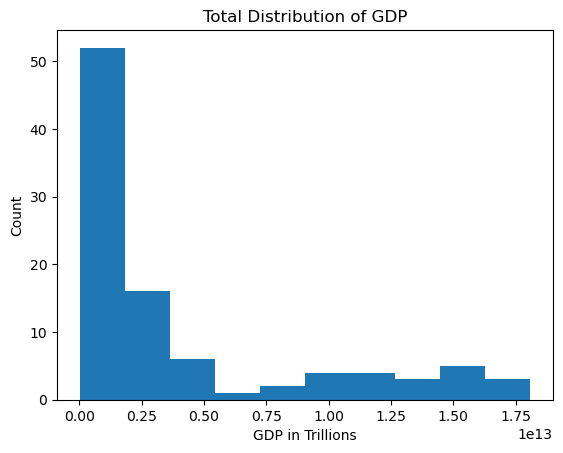

<Figure size 640x480 with 0 Axes>

In [29]:
# First look at the total distribution of GDP in a histogram
plt.hist(df.GDP)

# Label the Graph
plt.title('Total Distribution of GDP')
plt.xlabel('GDP in Trillions')
plt.ylabel('Count')
plt.show()
plt.clf()

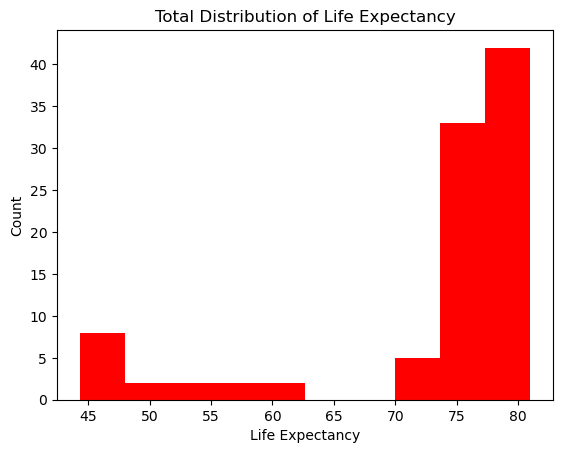

<Figure size 640x480 with 0 Axes>

In [30]:
# Look at the total distribution of Life Expectancy in a histogram
plt.hist(df.Life_Expectancy, color = 'red')

# Label the Graph
plt.title('Total Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.show()
plt.clf()

#### Bar Graphs

In [52]:
# Find the mean of both life expectancy & GDP 
dfmean = df.groupby('Country').mean().reset_index()
dfmean = dfmean.drop('Year', axis = 1)
dfmean

,Country,Life_Expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


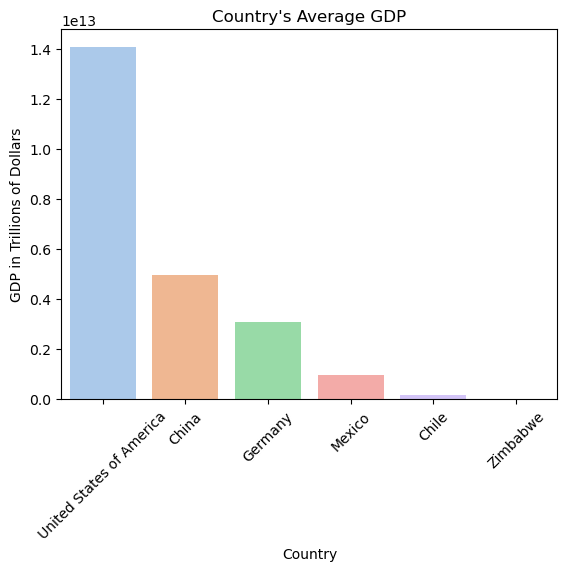

<Figure size 640x480 with 0 Axes>

In [56]:
# Then create a bar graph with each country and GDP

# Sort the DataFrame by 'GDP' in descending order for descending bar graph
dfmean_sorted_GDP = dfmean.sort_values('GDP', ascending=False)

# Create the bar graph
sns.barplot(x='Country', y='GDP', data=dfmean_sorted_GDP, palette='pastel')

# Label the Graph
plt.xticks(rotation=45)
plt.title("Country's Average GDP")
plt.xlabel('Country')
plt.ylabel('GDP in Trillions of Dollars')
plt.show()
plt.clf()

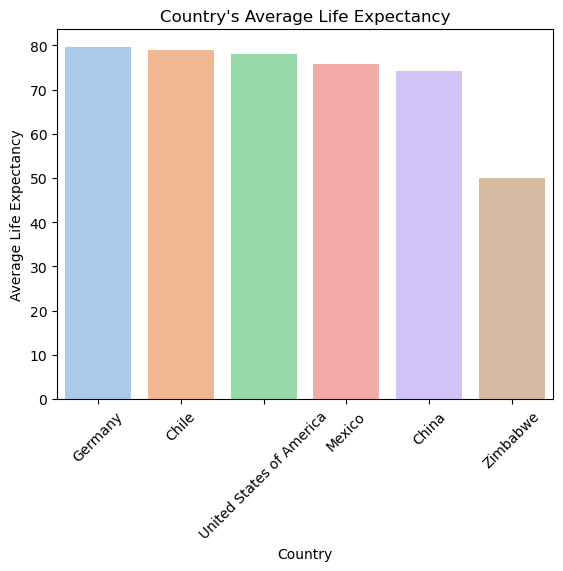

<Figure size 640x480 with 0 Axes>

In [57]:
# After create a bar graph with each country and Life Expectancy

# Sort the DataFrame by 'Life_Expectancy' in descending order for descending bar graph
dfmean_sorted_LE = dfmean.sort_values('Life_Expectancy', ascending=False)

# Create the bar graph
sns.barplot(x='Country', y='Life_Expectancy', data=dfmean_sorted_LE, palette='pastel')

# Label the Graph
plt.xticks(rotation=45)
plt.title("Country's Average Life Expectancy")
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.show()
plt.clf()

#### Line Graphs

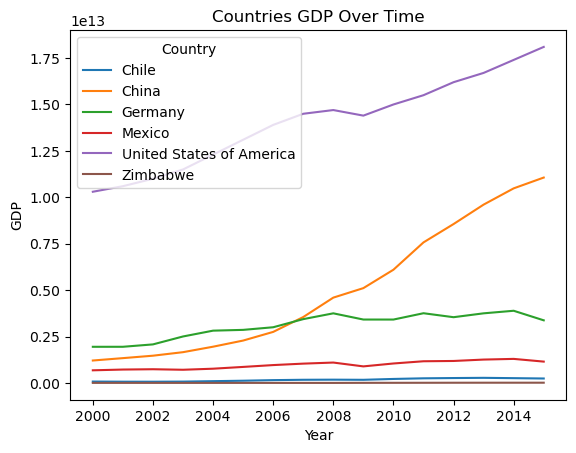

<Figure size 640x480 with 0 Axes>

In [63]:
# Check the GDP over time for each individual Country (One Plot)
sns.lineplot(x = 'Year', y = 'GDP', hue = 'Country', data=df)

# Label the Graph
plt.title("Countries GDP Over Time")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()

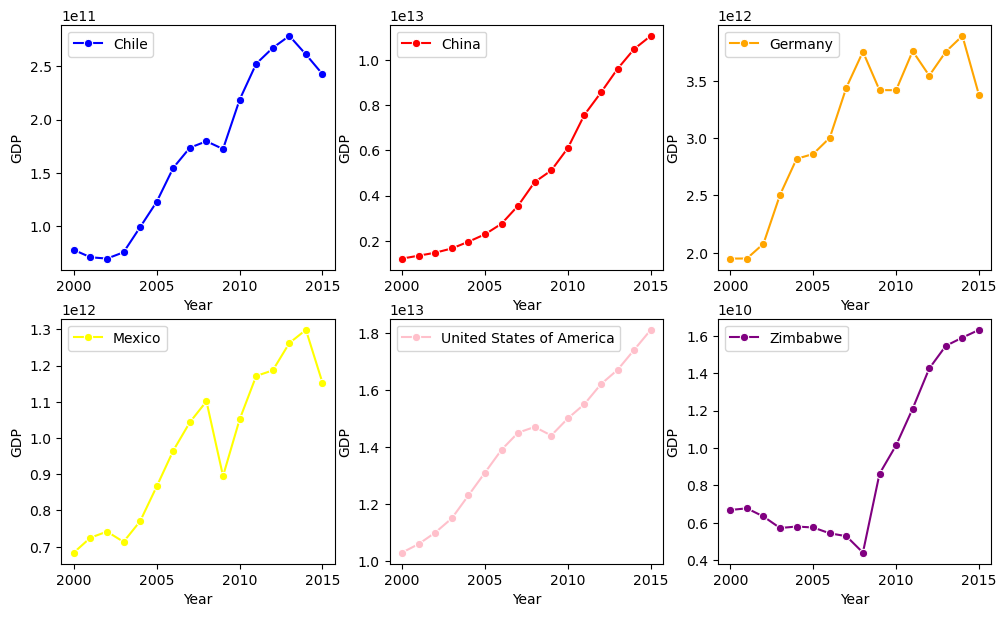

<Figure size 640x480 with 0 Axes>

In [89]:
# Check the GDP over time for each individual Country (6 subplots)

# Set the figure size
plt.figure(figsize=(12, 7))

# Plot the six plots
plt.subplot(2,3,1)
sns.lineplot(x='Year', y='GDP', data=df[df.Country == 'Chile'], marker='o', color='blue', label = 'Chile')
plt.subplot(2,3,2)
sns.lineplot(x='Year', y='GDP', data=df[df.Country == 'China'], marker='o', color='red', label = 'China')
plt.subplot(2,3,3)
sns.lineplot(x='Year', y='GDP', data=df[df.Country == 'Germany'], marker='o', color='orange', label = 'Germany')
plt.subplot(2,3,4)
sns.lineplot(x='Year', y='GDP', data=df[df.Country == 'Mexico'], marker='o', color='yellow', label = 'Mexico')
plt.subplot(2,3,5)
sns.lineplot(x='Year', y='GDP', data=df[df.Country == 'United States of America'], marker='o', color='pink', label = 'United States of America')
plt.subplot(2,3,6)
sns.lineplot(x='Year', y='GDP', data=df[df.Country == 'Zimbabwe'], marker='o', color='purple', label = 'Zimbabwe')

plt.show()
plt.clf()


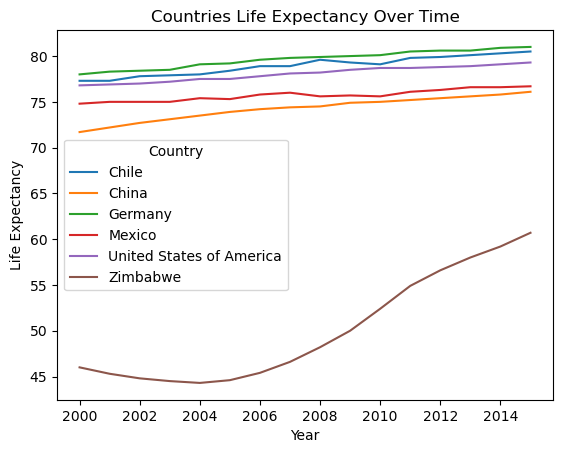

<Figure size 640x480 with 0 Axes>

In [65]:
# Check the Life Expectancy over time for each individual Country (One Plot)
sns.lineplot(x = 'Year', y = 'Life_Expectancy', hue = 'Country', data=df)

# Label the Graph
plt.title("Countries Life Expectancy Over Time")
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()
plt.clf()

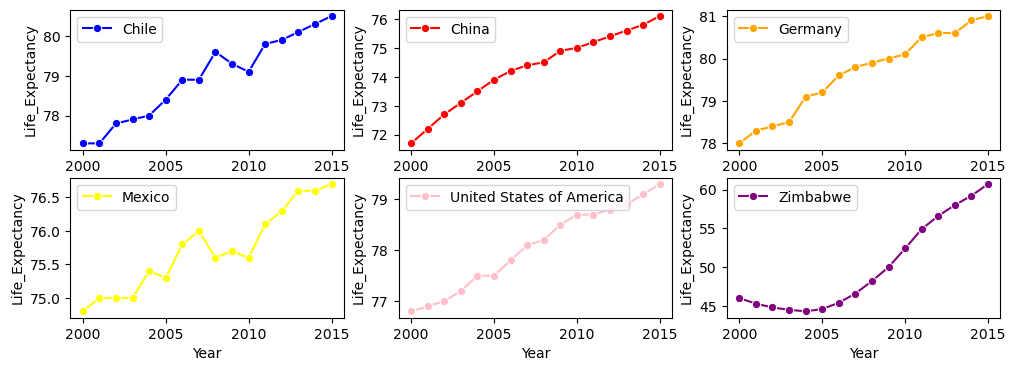

<Figure size 640x480 with 0 Axes>

In [88]:
# Check the Life Expectancy over time for each individual Country (6 subplots)

# Set the figure size
plt.figure(figsize=(12, 4))

# Plot the six plots
plt.subplot(2,3,1)
sns.lineplot(x='Year', y='Life_Expectancy', data=df[df.Country == 'Chile'], marker='o', color='blue', label = 'Chile')
plt.subplot(2,3,2)
sns.lineplot(x='Year', y='Life_Expectancy', data=df[df.Country == 'China'], marker='o', color='red', label = 'China')
plt.subplot(2,3,3)
sns.lineplot(x='Year', y='Life_Expectancy', data=df[df.Country == 'Germany'], marker='o', color='orange', label = 'Germany')
plt.subplot(2,3,4)
sns.lineplot(x='Year', y='Life_Expectancy', data=df[df.Country == 'Mexico'], marker='o', color='yellow', label = 'Mexico')
plt.subplot(2,3,5)
sns.lineplot(x='Year', y='Life_Expectancy', data=df[df.Country == 'United States of America'], marker='o', color='pink', label = 'United States of America')
plt.subplot(2,3,6)
sns.lineplot(x='Year', y='Life_Expectancy', data=df[df.Country == 'Zimbabwe'], marker='o', color='purple', label = 'Zimbabwe')

plt.show()
plt.clf()

#### Scatter Plot

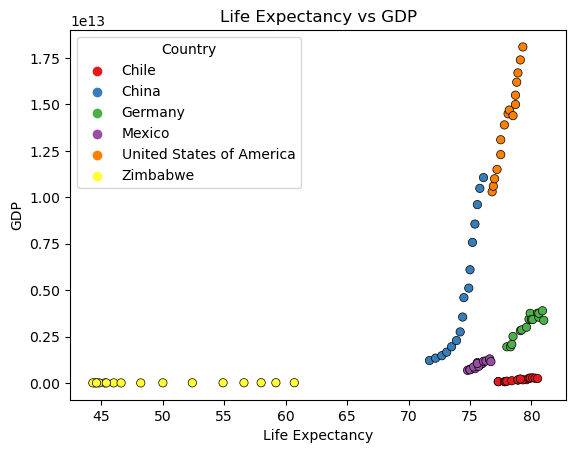

<Figure size 640x480 with 0 Axes>

In [77]:
# Compare the Life Expectancy to the GDP (using a hue = country)

sns.scatterplot(x='Life_Expectancy', y='GDP', hue='Country', data=df, palette='Set1', markers='s', edgecolor='black', linewidth=.5)

# Label the Graph
plt.title("Life Expectancy vs GDP")
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.show()
plt.clf()

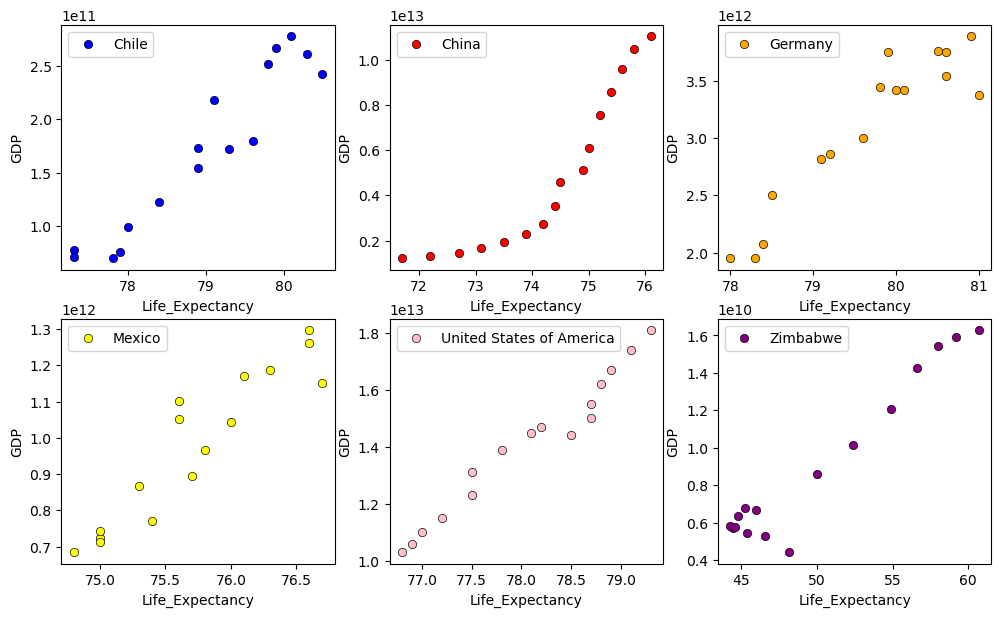

<Figure size 640x480 with 0 Axes>

In [86]:
# Compare the Life Expectancy to the GDP in individual graphs to better see the correlation for each country

# Set the figure size
plt.figure(figsize=(12, 7))

# Plot the six plots
plt.subplot(2,3,1)
sns.scatterplot(x='Life_Expectancy', y='GDP', data=df[df.Country == 'Chile'], markers='s', color='blue', edgecolor = 'black', label = 'Chile')
plt.subplot(2,3,2)
sns.scatterplot(x='Life_Expectancy', y='GDP', data=df[df.Country == 'China'], markers='s', color='red', edgecolor = 'black', label = 'China')
plt.subplot(2,3,3)
sns.scatterplot(x='Life_Expectancy', y='GDP', data=df[df.Country == 'Germany'], markers='s', color='orange', edgecolor = 'black', label = 'Germany')
plt.subplot(2,3,4)
sns.scatterplot(x='Life_Expectancy', y='GDP', data=df[df.Country == 'Mexico'], markers='s', color='yellow', edgecolor = 'black', label = 'Mexico')
plt.subplot(2,3,5)
sns.scatterplot(x='Life_Expectancy', y='GDP', data=df[df.Country == 'United States of America'], markers='s', color='pink', edgecolor = 'black', label = 'United States of America')
plt.subplot(2,3,6)
sns.scatterplot(x='Life_Expectancy', y='GDP', data=df[df.Country == 'Zimbabwe'], markers='s', color='purple', edgecolor = 'black', label = 'Zimbabwe')

plt.show()
plt.clf()


## Conclusions

My goal going into this project was to try and use as many different visualizations that I had learned to my advantage. After completing this project, I learned that even without data that has thousands of rows, I could make a variety of different visuals. Although I did not use all the visualizations I learned I think that the visualizations I used were more beneficial in answering the questions I wanted to answer.

To answer the questions I wanted to explore from the beginning: 

* What is the distribution of life expectancy & GDP for these nations?
    - The total distribution of life expectancy was skewed left, while the total distribution of GDP was skewed right
* What is the average life expectancy in these nations?
    - As can be seen in the table 'dfmean' the average life expectancy for each nation between the years 2000-2015 was Chile - 78.9, China - 74.3, Germany - 79.7, Mexico - 75.7, U.S. - 78.1, Zimbabwe - 50.1
* Has life expectancy increased over time?
    - Yes, each country's life expectancy has increased over time, although some country's life expectancy, like Zimbabwe, has increased at a faster rate
* How has the life expectancy changed over time for each nation?
    - For the most part nations seem to have to have a gradual increse over time, but Mexico and Chile did have a dip around the 2010s.
* Has GDP increased over time?
    - Yes, each country's GDP has increased overtime.
* How has GDP changed over time for each nation?
    - While countries like China and the US have had a gradual increase over time, Chile, Germany, and Mexico all had a fall in there GDP prior to 2015. Zimbabwe was decreasing until 2008 and since then there GDP has been on an incline.
* Is there a correlation between GDP and life expectancy of a country?
    - Yes, in our list of countries there is a positive correlation shown between GDP and life expectancy.